<a href="https://colab.research.google.com/github/taruma/inkovis/blob/master/notebook/inkovis_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INKOVIS

Buku (_jupyter notebook_) ini mendemonstrasikan penggunaan modul `inkovis` untuk memvisualisasikan data infeksi COVID-19 di Indonesia.

Informasi lebih lanjut kunjungi _github repository_ [taruma/inkovis](https://github.com/taruma/inkovis).

# INISIASI BUKU

In [1]:
#@title LOKAL/COLAB

IS_LOCAL = True #@param {type:"boolean"}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# DEVELOPMENT
if IS_LOCAL:
    %load_ext autoreload
    %autoreload 2
    import inkovis
else:
    !wget -O inkovis.py "https://github.com/taruma/inkovis/raw/master/notebook/inkovis.py" -q
    !wget -O so.py "https://github.com/taruma/inkovis/raw/master/notebook/so.py" -q
    import inkovis
    import os
    os.mkdir('IMG')

# DATASET

In [4]:
ALAMAT_DATASET = 'https://github.com/taruma/inkovis/raw/master/dataset/data_infeksi_covid19_indonesia.csv'

In [5]:
raw_dataset = pd.read_csv(ALAMAT_DATASET, index_col=0, parse_dates=True, header=0)
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2020-02-18 to 2020-03-30
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   jumlah_periksa   42 non-null     int64 
 1   konfirmasi       42 non-null     int64 
 2   sembuh           42 non-null     int64 
 3   meninggal        42 non-null     int64 
 4   negatif          42 non-null     int64 
 5   proses_periksa   42 non-null     int64 
 6   kasus_perawatan  42 non-null     int64 
 7   catatan          6 non-null      object
dtypes: int64(7), object(1)
memory usage: 3.0+ KB


In [6]:
raw_dataset.tail()

,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan,catatan
tanggal,,,,,,,,
2020-03-26,4336,893,35,78,3443,0,0,NaN
2020-03-27,5775,1046,46,87,4729,0,0,NaN
2020-03-28,6266,1155,59,102,5111,0,0,NaN
2020-03-29,6534,1285,64,114,5249,0,0,NaN
2020-03-30,6663,1414,75,122,5249,0,0,NaN


# VISUALISASI DATA

In [7]:
FIG_SIZE = (20, 8)

## JUMLAH KASUS KONFIRMASI POSITIF

### Seluruh Data (Per 2 Hari)

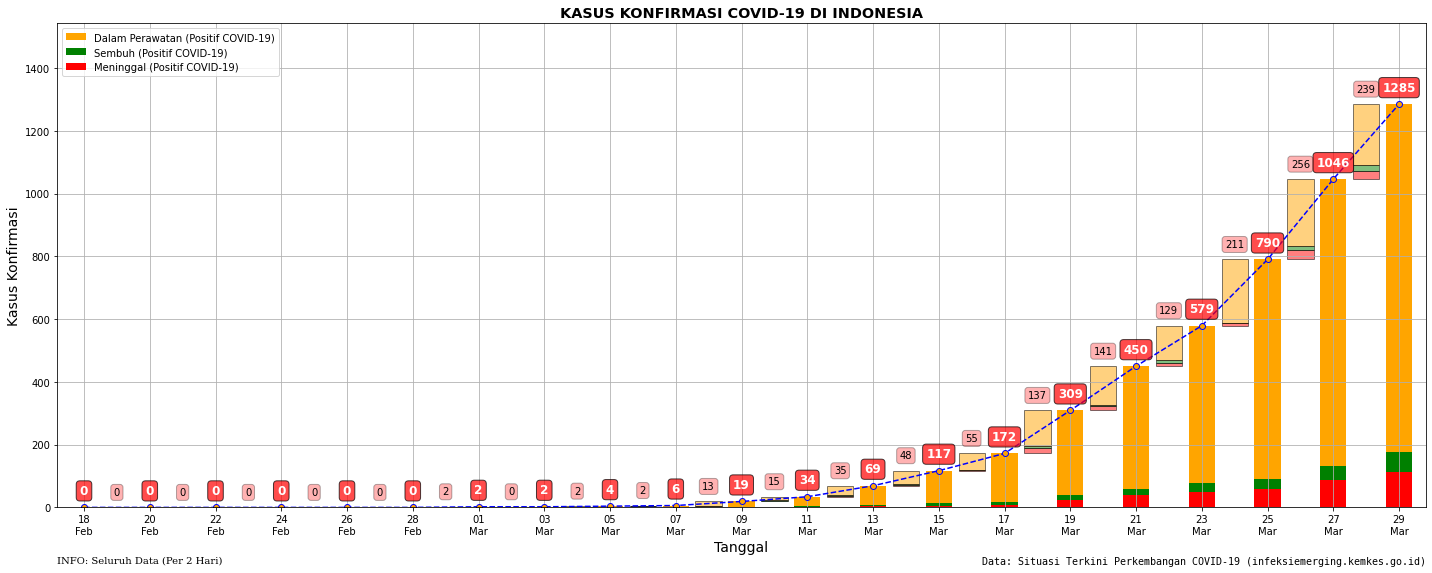

In [8]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_confirmed_case(
    raw_dataset, ax, days=2,
    show_diff_numbers=True, show_hist=False,
    text_left='INFO: Seluruh Data (Per 2 Hari)'
)

plt.savefig('IMG/KASUS_KONFIRMASI_S_2HARI.png',dpi=150)

### Sejak Maret (Harian)

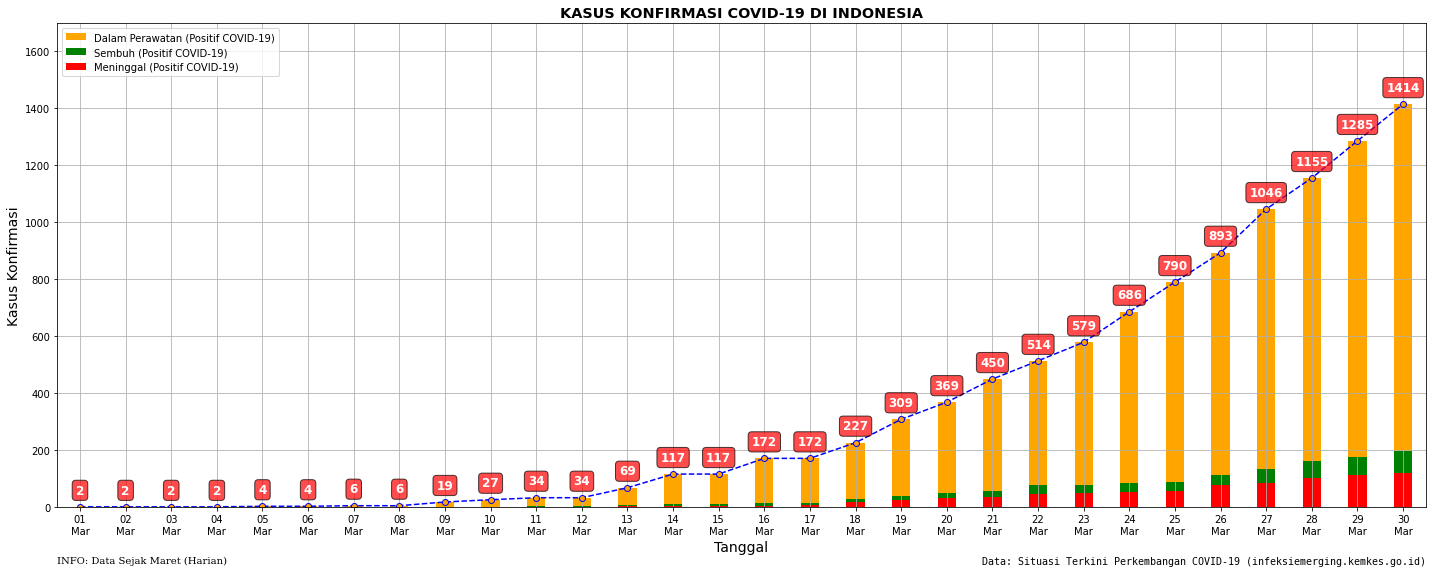

In [9]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_confirmed_case(
    raw_dataset, ax, mask=('2020-03', None), days=1,
    show_hist=False, show_diff_bar=False,
    text_left='INFO: Data Sejak Maret (Harian)')

plt.savefig('IMG/KASUS_KONFIRMASI_SMARET_HARIAN.png',dpi=150)

### Sejak Maret, Per 2 Hari

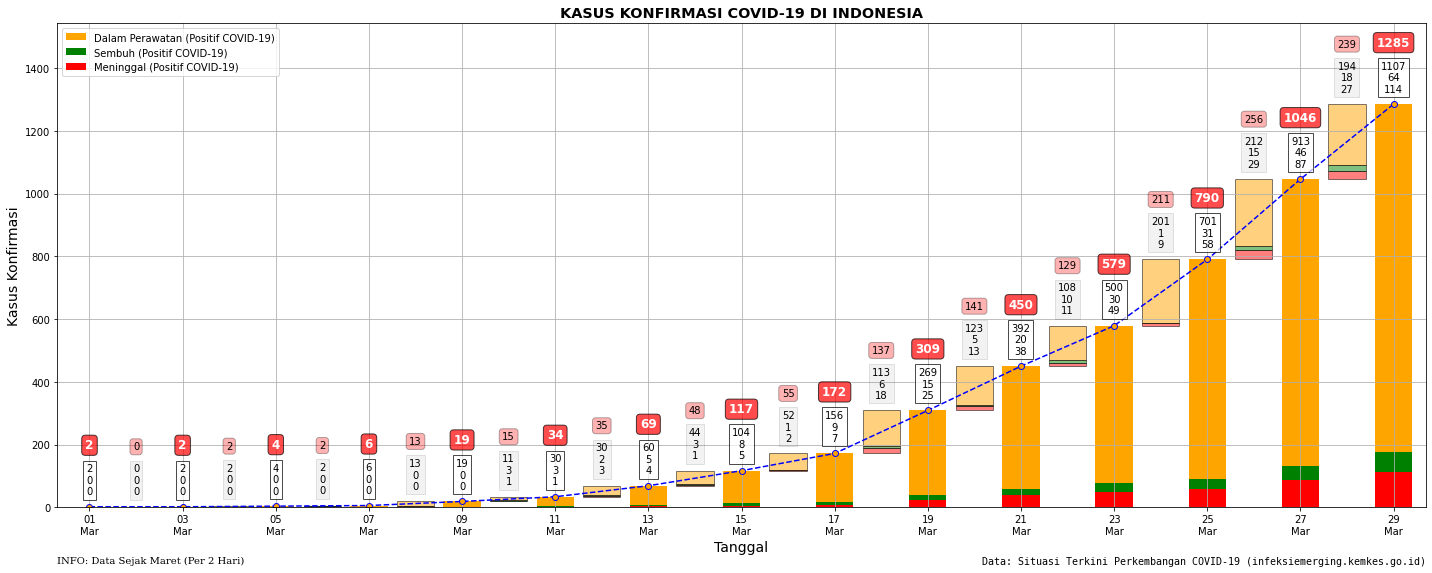

In [10]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_confirmed_case(
    raw_dataset, ax, mask=('2020-03', None), days=2,
    show_diff_numbers=True,
    text_left="INFO: Data Sejak Maret (Per 2 Hari)")

plt.savefig('IMG/KASUS_KONFIRMASI_SMARET_2HARI.png',dpi=150)

### 15 Hari Terakhir (Harian)

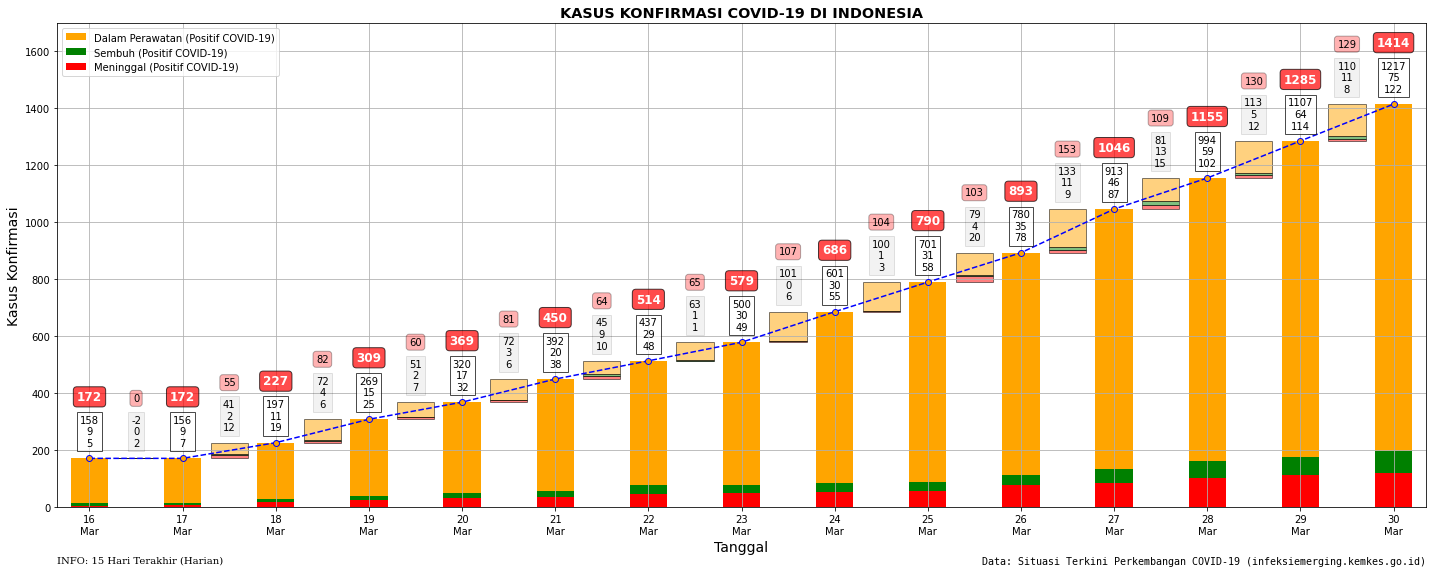

In [11]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_confirmed_case(
    raw_dataset[-15:], ax, days=1,
    show_diff_numbers=True,
    text_left='INFO: 15 Hari Terakhir (Harian)'
)

plt.savefig('IMG/KASUS_KONFIRMASI_15AKHIR_HARIAN.png',dpi=150)

## JUMLAH SPESIMEN/PENGUJIAN

### Seluruh Data (Per 2 Hari)

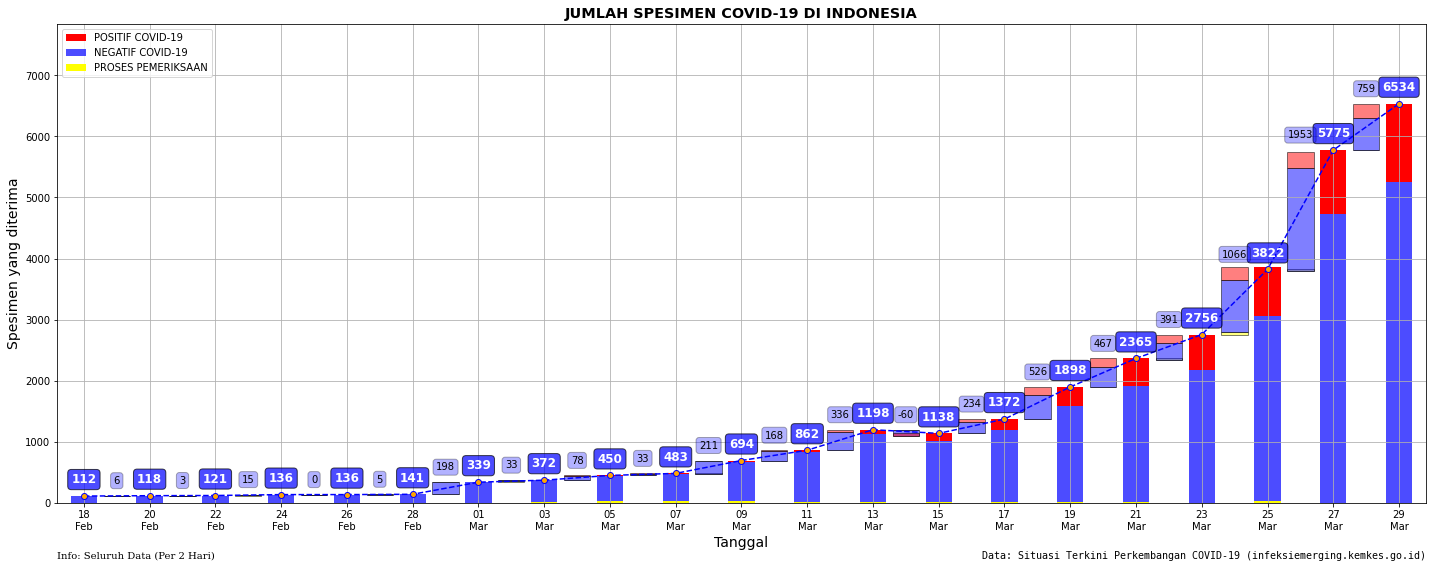

In [12]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_testing_case(
    raw_dataset, ax, days=2, 
    show_diff_numbers=True, show_hist=False,
    text_left="Info: Seluruh Data (Per 2 Hari)")

plt.savefig('IMG/JUMLAH_SPESIMEN_S_2HARI.png', dpi=150)

### Sejak Bulan Maret (Harian)

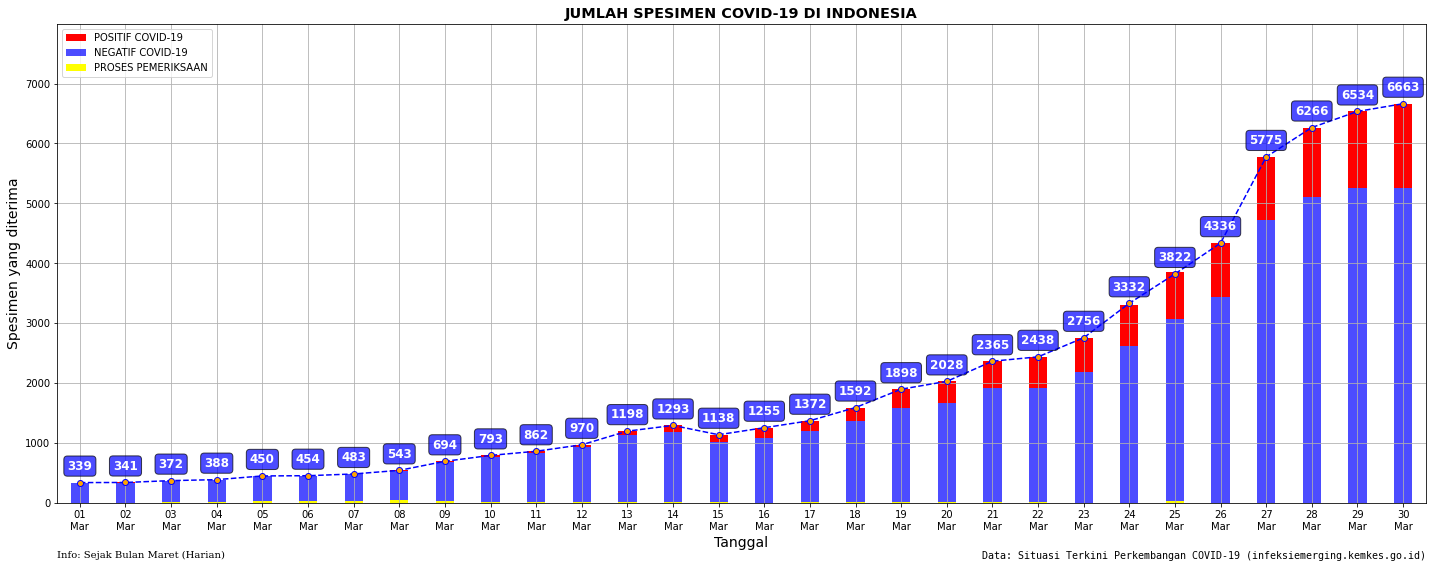

In [13]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_testing_case(
    raw_dataset, ax, mask=('2020-03', None),
    show_hist=False, show_diff_bar=False,
    text_left="Info: Sejak Bulan Maret (Harian)")

plt.savefig('IMG/JUMLAH_SPESIMEN_SMARET_HARIAN.png', dpi=150)

### Sejak Bulan Maret (Per 2 Hari)

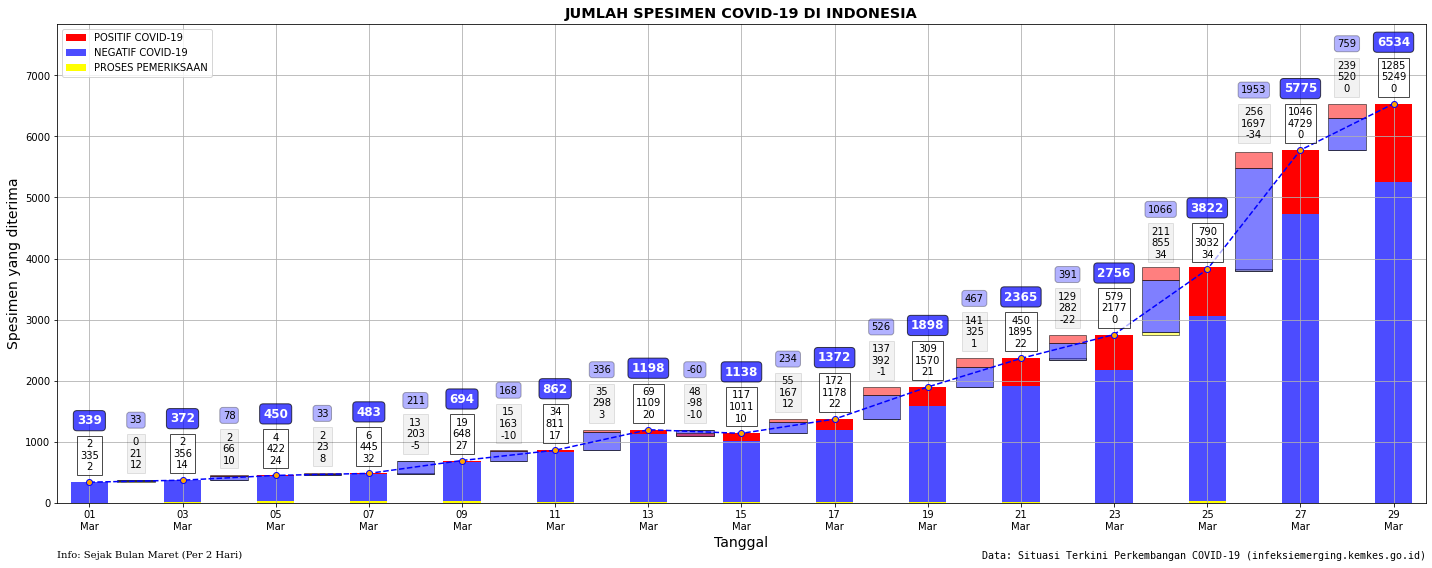

In [14]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_case(
    raw_dataset, ax, mask=('2020-03', None), days=2,
    show_diff_numbers=True,
    text_left="Info: Sejak Bulan Maret (Per 2 Hari)")

plt.savefig('IMG/JUMLAH_SPESIMEN_SMARET_2HARI.png', dpi=150)

### 15 Hari Terakhir (Harian)

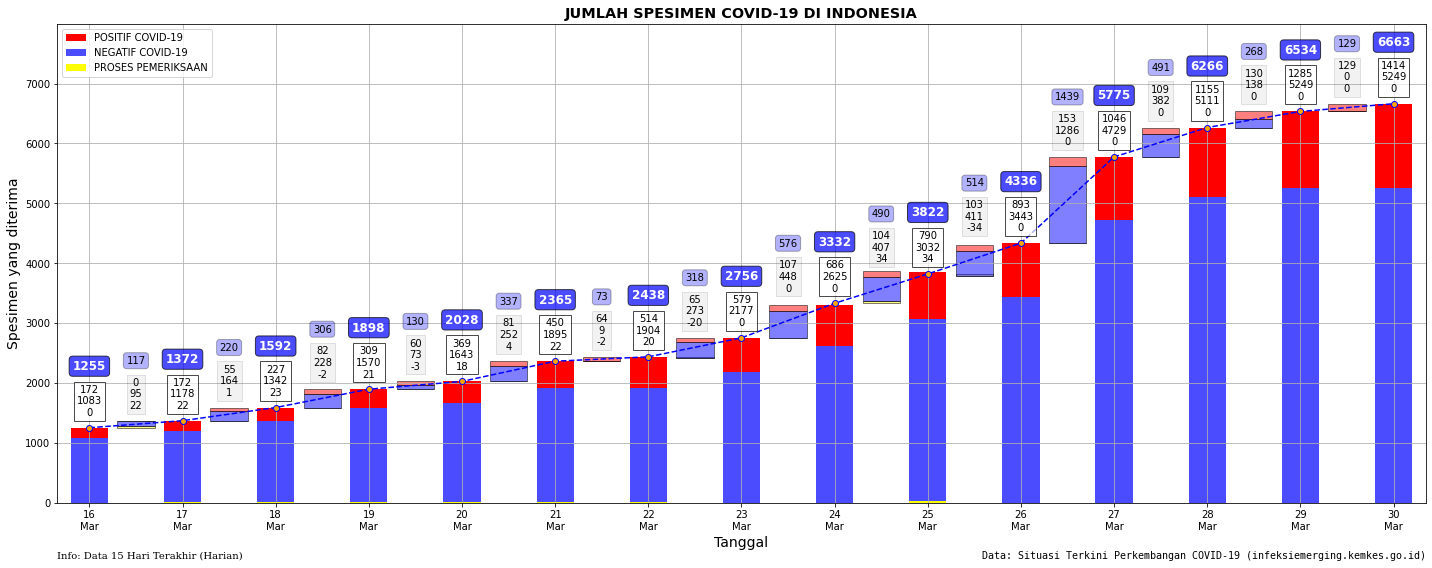

In [15]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_case(
    raw_dataset[-15:], ax, 
    show_diff_numbers=True, 
    text_left="Info: Data 15 Hari Terakhir (Harian)")

plt.savefig('IMG/JUMLAH_SPESIMEN_15AKHIR_HARIAN.png', dpi=150)

## PERKEMBANGAN KASUS POSITIF

### Seluruh Data (Per 2 Hari)

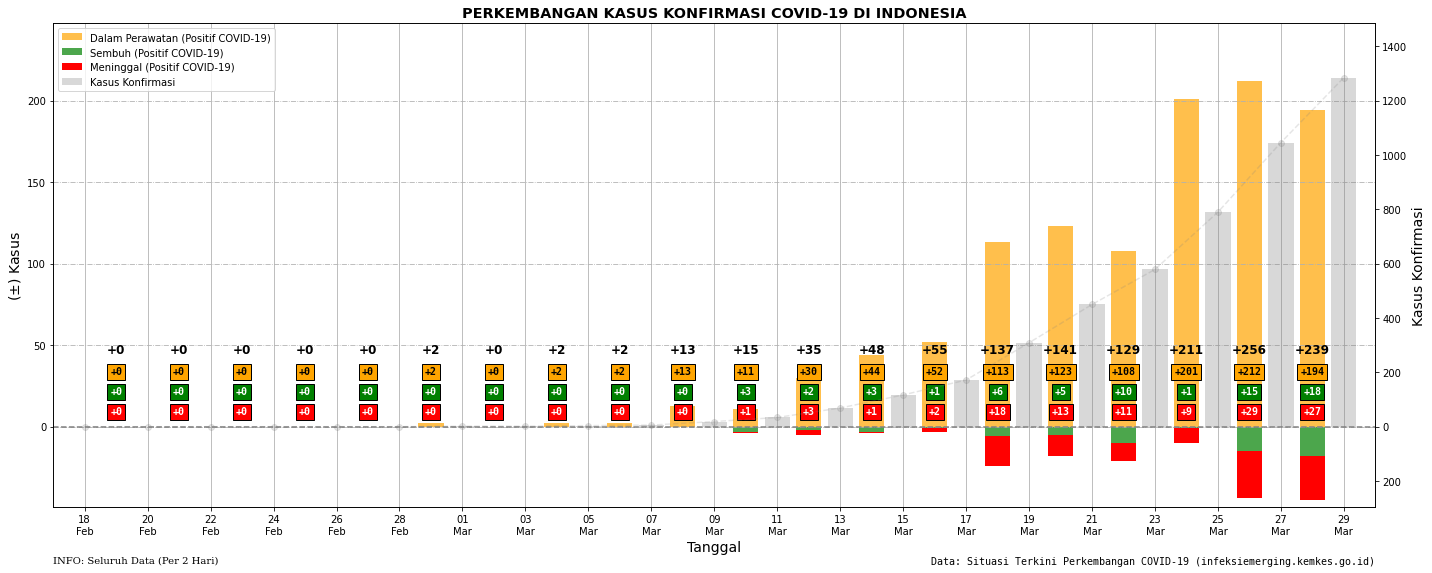

In [16]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_confirmed_growth(
    raw_dataset, ax, days=2,
    text_left='INFO: Seluruh Data (Per 2 Hari)',
    show_confirmed=True, show_confirmed_numbers=False)

plt.savefig('IMG/PERKEMBANGAN_KASUS_KONFIRMASI_S_2HARI.png', dpi=150)

### Sejak Bulan Maret (Harian)

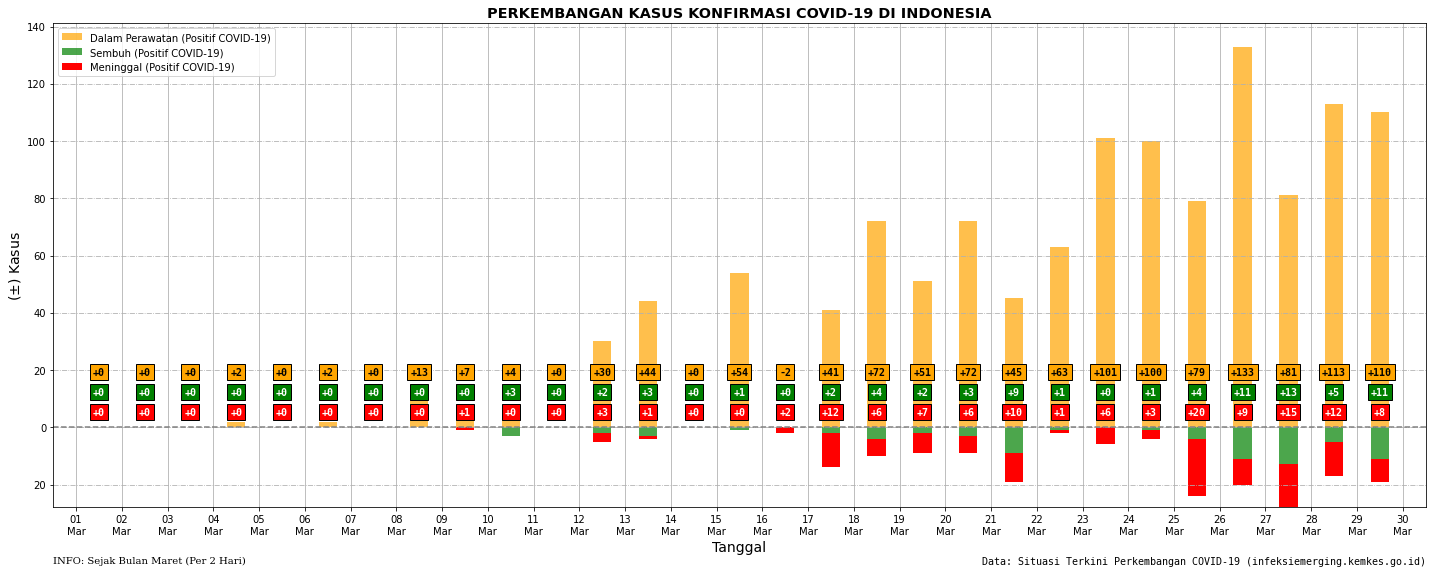

In [17]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_confirmed_growth(
    raw_dataset, ax, mask=('2020-03', None),
    text_left='INFO: Sejak Bulan Maret (Per 2 Hari)', 
    show_total_numbers=False, days=1)

plt.savefig('IMG/PERKEMBANGAN_KASUS_KONFIRMASI_SMARET_HARIAN.png', dpi=150)

### Sejak Bulan Maret (Per 2 Hari)

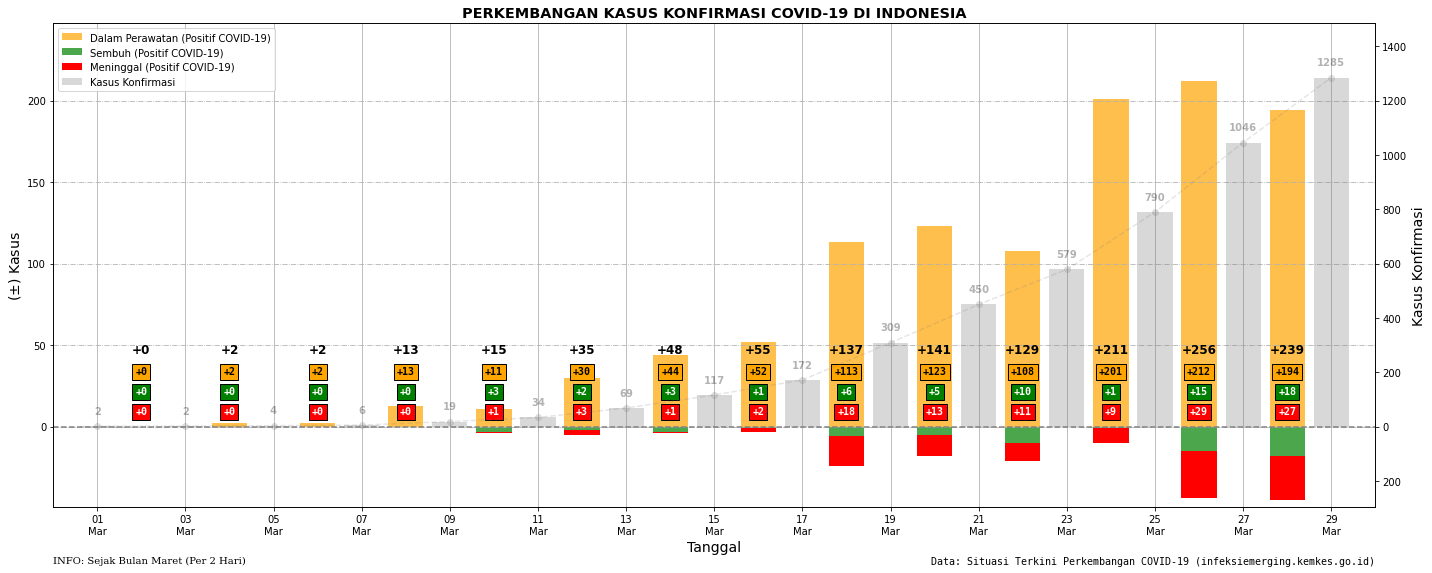

In [18]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_confirmed_growth(
    raw_dataset, ax, mask=('2020-03', None), days=2,
    text_left='INFO: Sejak Bulan Maret (Per 2 Hari)',
    show_confirmed=True)

plt.savefig('IMG/PERKEMBANGAN_KASUS_KONFIRMASI_SMARET_2HARI.png', dpi=150)

### 15 Hari Terakhir (Harian)

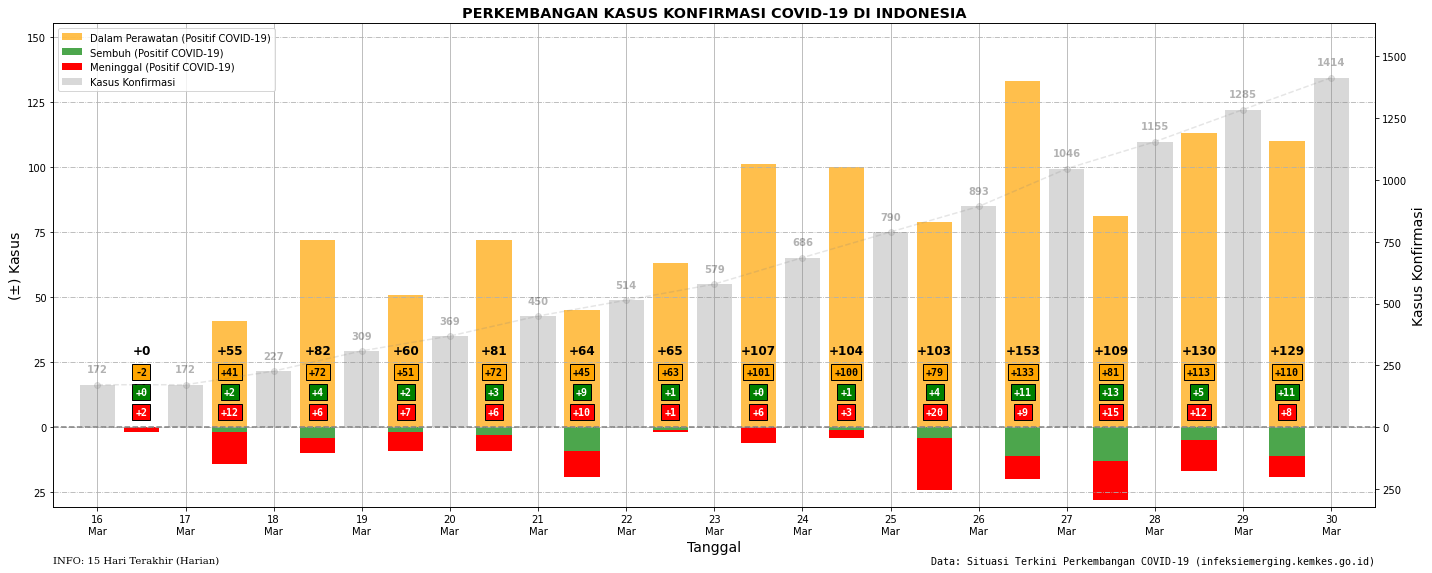

In [19]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_confirmed_growth(
    raw_dataset[-15:], ax, days=1,
    text_left='INFO: 15 Hari Terakhir (Harian)',
    show_confirmed=True)

plt.savefig('IMG/PERKEMBANGAN_KASUS_KONFIRMASI_15AKHIR_HARIAN.png', dpi=150)

## PERKEMBANGAN PENGUJIAN

### Seluruh Data (Per 2 Hari)

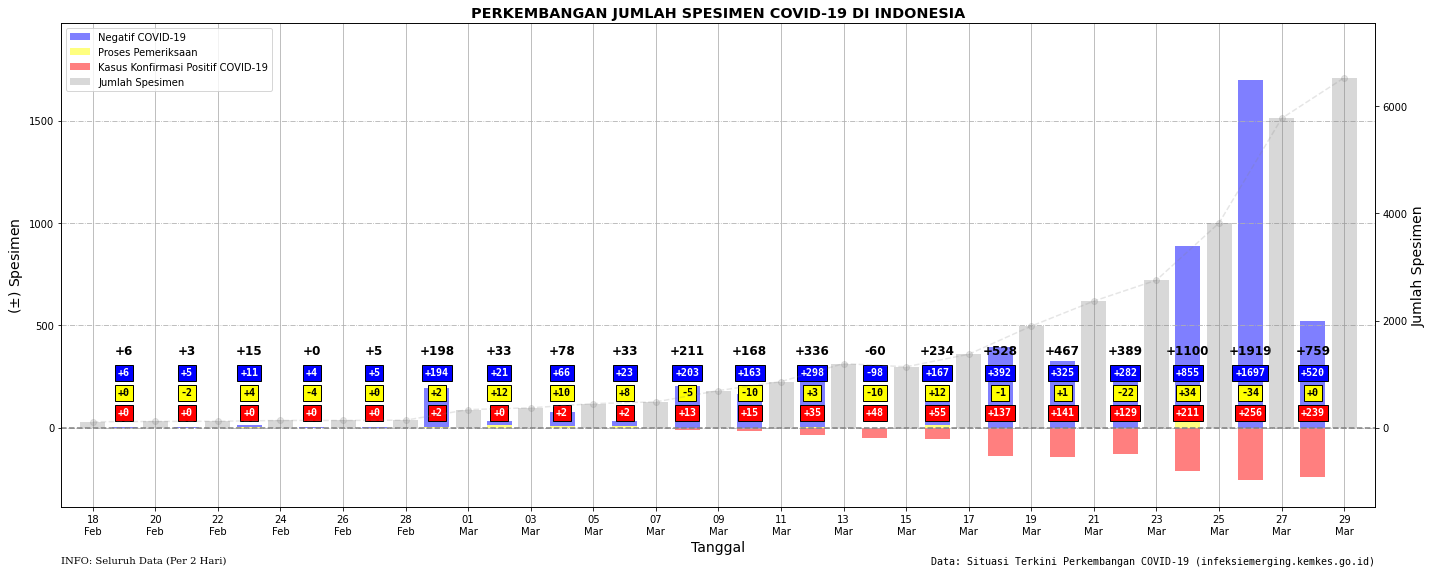

In [20]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_growth(
    raw_dataset, ax, days=2, 
    text_left='INFO: Seluruh Data (Per 2 Hari)',
    show_confirmed=True, show_confirmed_numbers=False)

plt.savefig('IMG/PERKEMBANGAN_JUMLAH_SPESIMEN_S_2HARI.png', dpi=150)

### Sejak Bulan Maret (Harian)

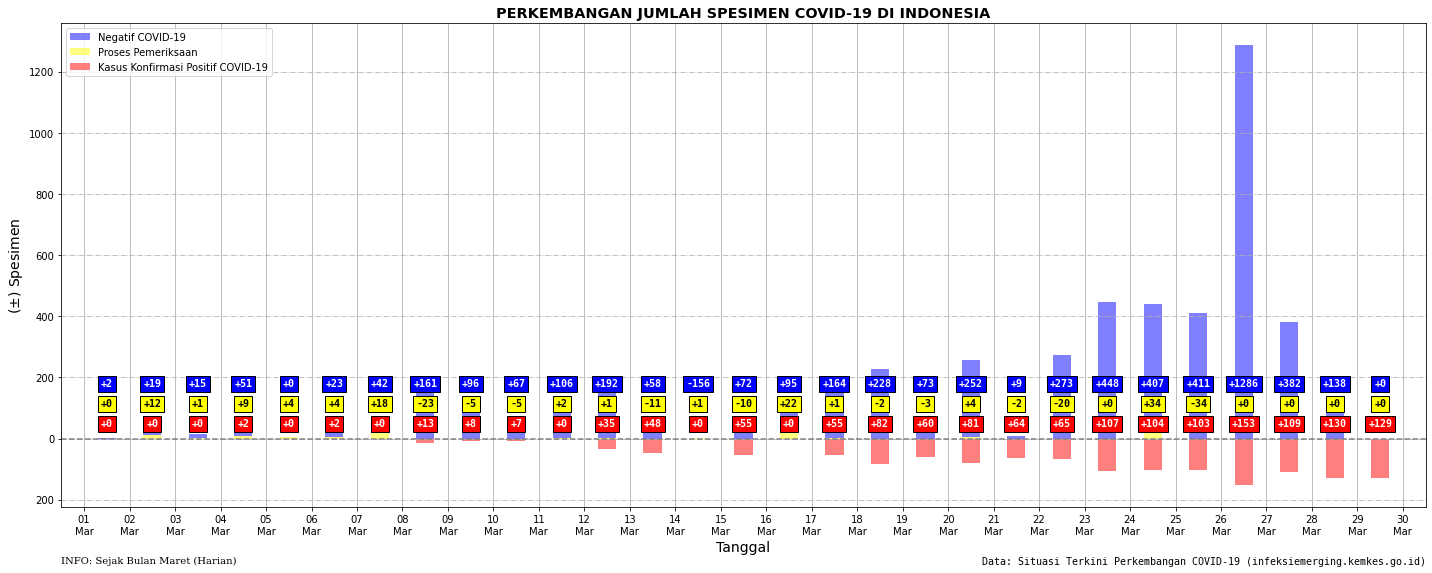

In [21]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_growth(
    raw_dataset, ax, mask=('2020-03', None),
    text_left='INFO: Sejak Bulan Maret (Harian)', 
    show_total_numbers=False, days=1)

plt.savefig('IMG/PERKEMBANGAN_JUMLAH_SPESIMEN_SMARET_HARIAN.png', dpi=150)

### Sejak Bulan Maret (Per 2 Hari)

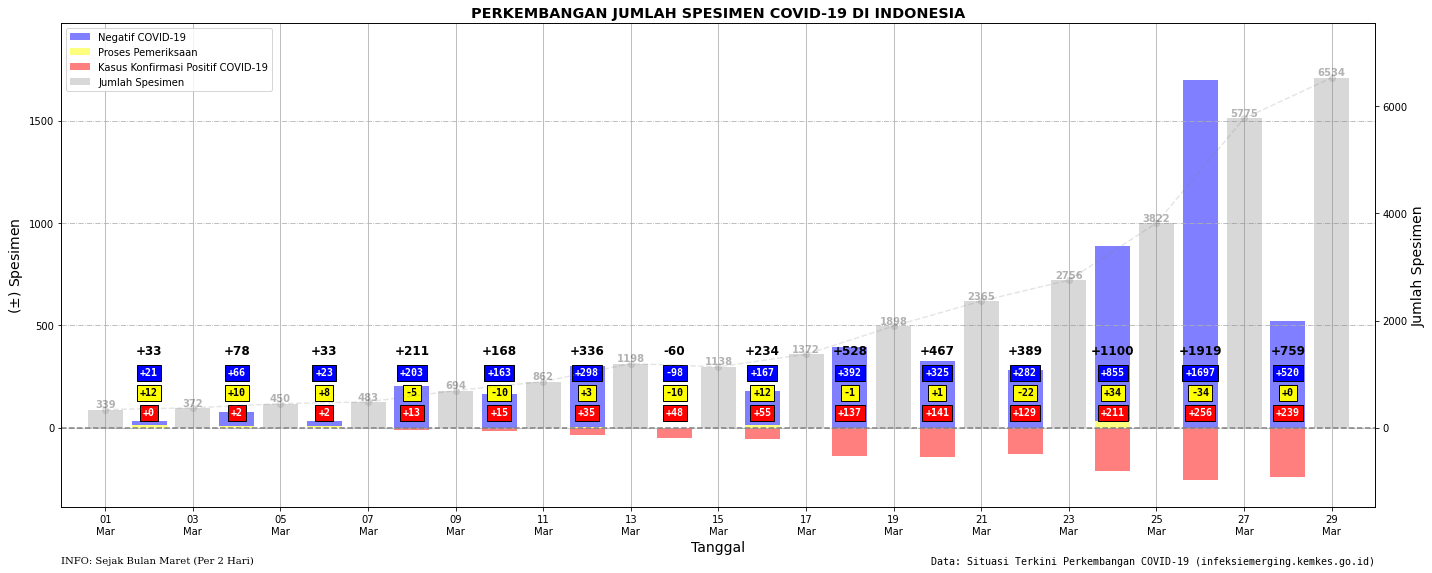

In [22]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_growth(
    raw_dataset, ax, mask=('2020-03', None), days=2,
    text_left='INFO: Sejak Bulan Maret (Per 2 Hari)',
    show_confirmed=True)

plt.savefig('IMG/PERKEMBANGAN_JUMLAH_SPESIMEN_SMARET_2HARI.png', dpi=150)

### 15 Hari Terakhir (Harian)

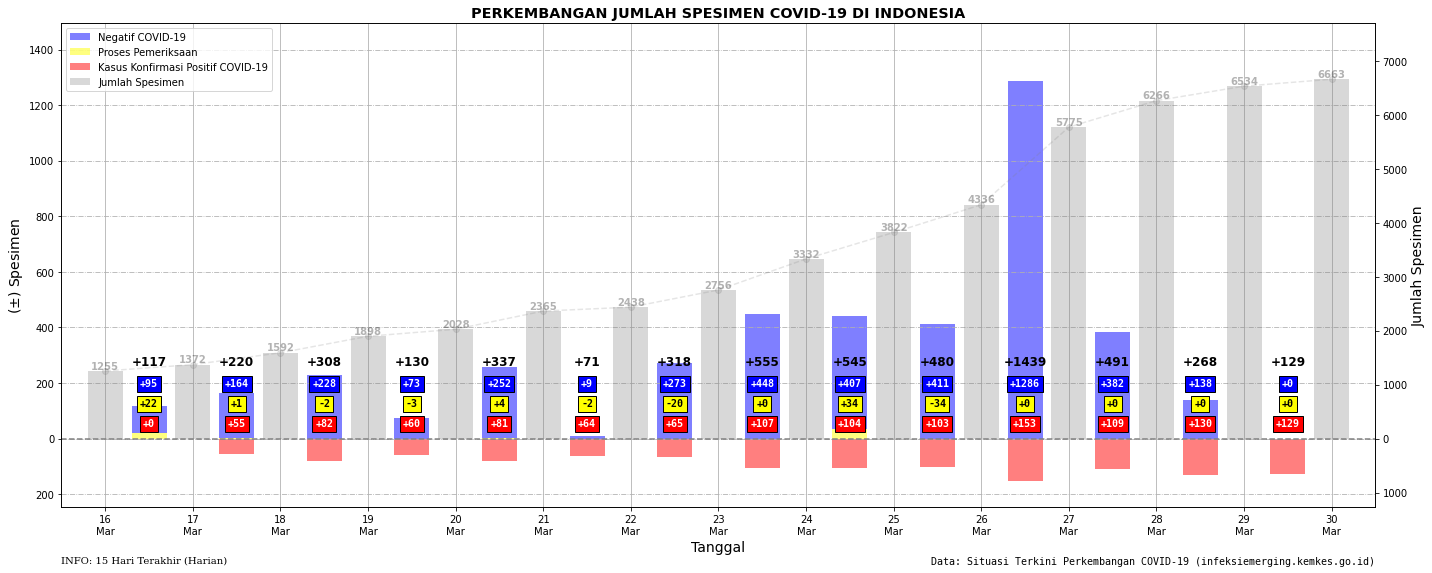

In [23]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_growth(
    raw_dataset[-15:], ax, days=1,
    text_left='INFO: 15 Hari Terakhir (Harian)',
    show_confirmed=True)

plt.savefig('IMG/PERKEMBANGAN_JUMLAH_SPESIMEN_15AKHIR_HARIAN.png', dpi=150)

## KASUS KONFIRMASI DAN PERKEMBANGAN

### Seluruh Data (Per 2 Hari)

/home/runner/work/inkovis/inkovis/notebook/inkovis.py:617: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


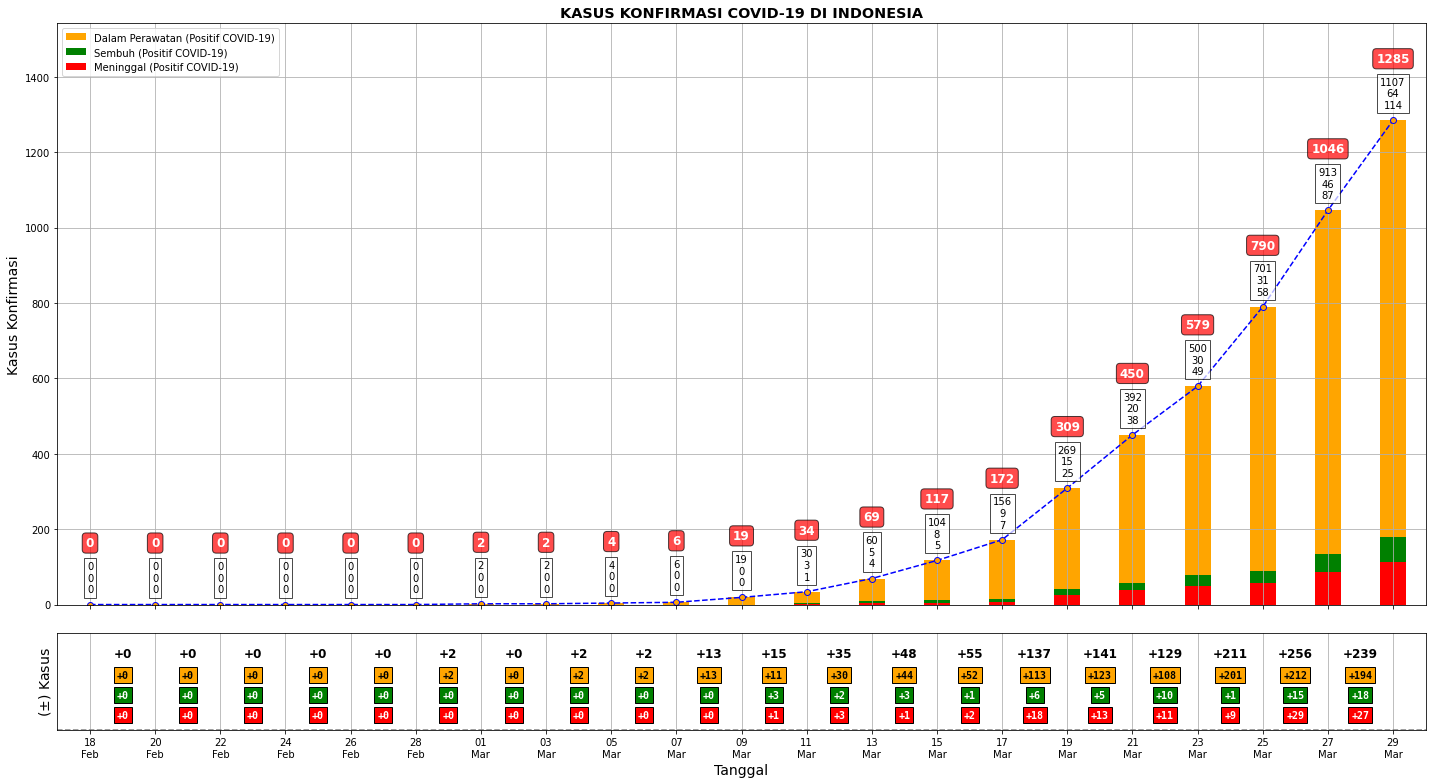

In [24]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[6, 1]})

_MASK = None
_DATASET = raw_dataset
_DAYS = 2

inkovis.plot_confirmed_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False
)

inkovis.plot_confirmed_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=False, show_confirmed=False, 
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/KONFIRMASI_PERKEMBANGAN_S_2HARI.png', dpi=150)

### Sejak Bulan Maret (Harian)

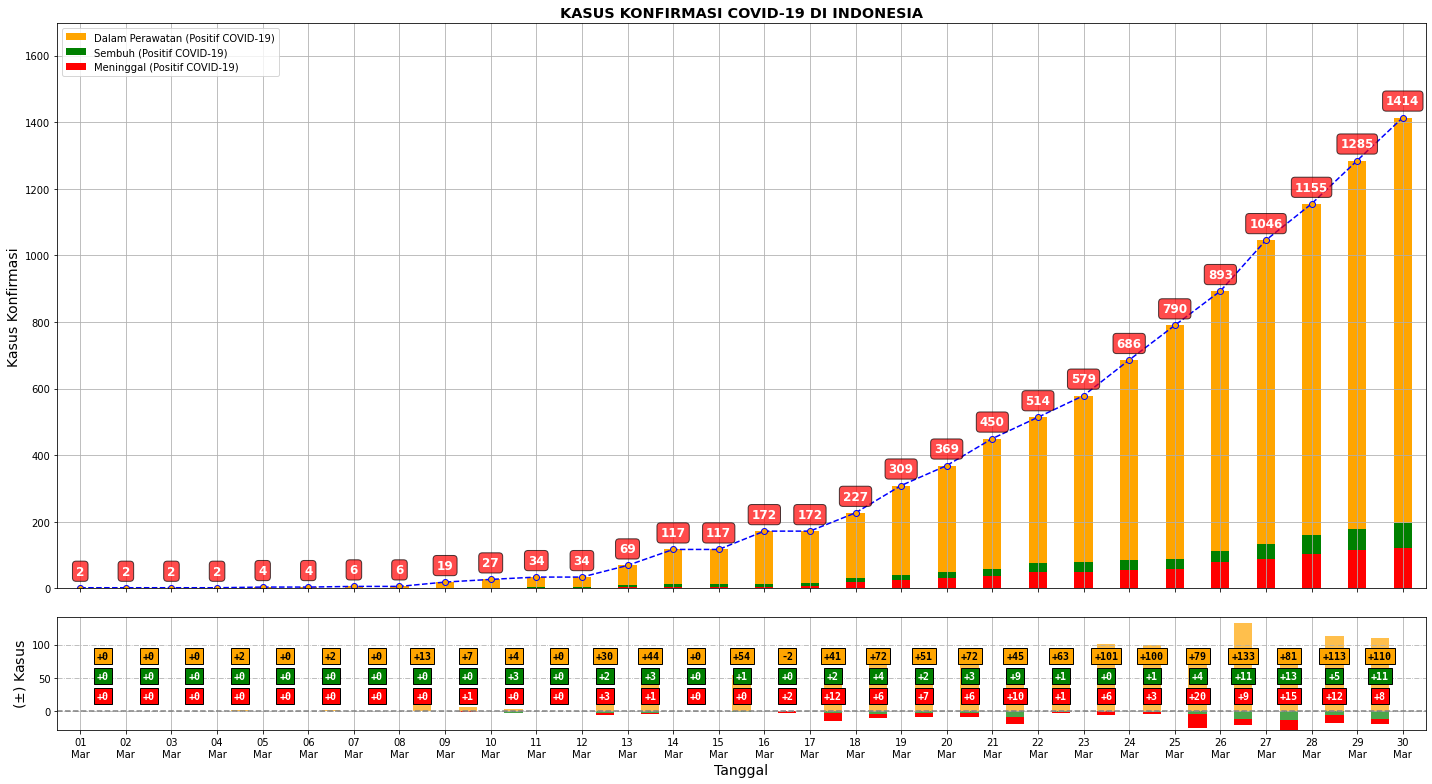

In [25]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[5, 1]})

_MASK = ('2020-03', None)
_DATASET = raw_dataset
_DAYS = 1

inkovis.plot_confirmed_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_confirmed_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=False, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/KONFIRMASI_PERKEMBANGAN_SMARET_HARIAN.png', dpi=150)

### Sejak Bulan Maret (Per 2 Hari)

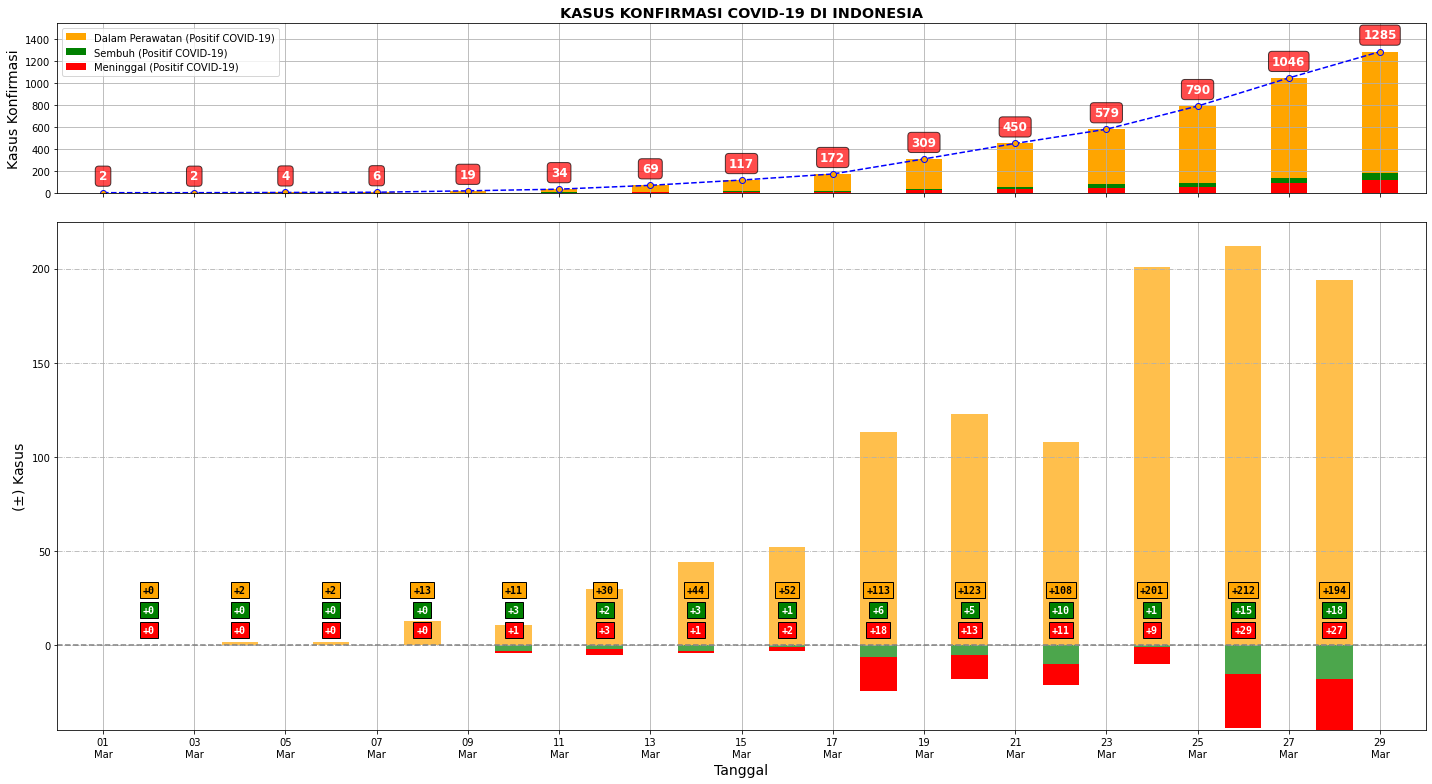

In [26]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

_MASK = ('2020-03', None)
_DATASET = raw_dataset
_DAYS = 2

inkovis.plot_confirmed_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_confirmed_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=False, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/KONFIRMASI_PERKEMBANGAN_SMARET_2HARI.png', dpi=150)

### 15 Hari Terakhir (Harian)

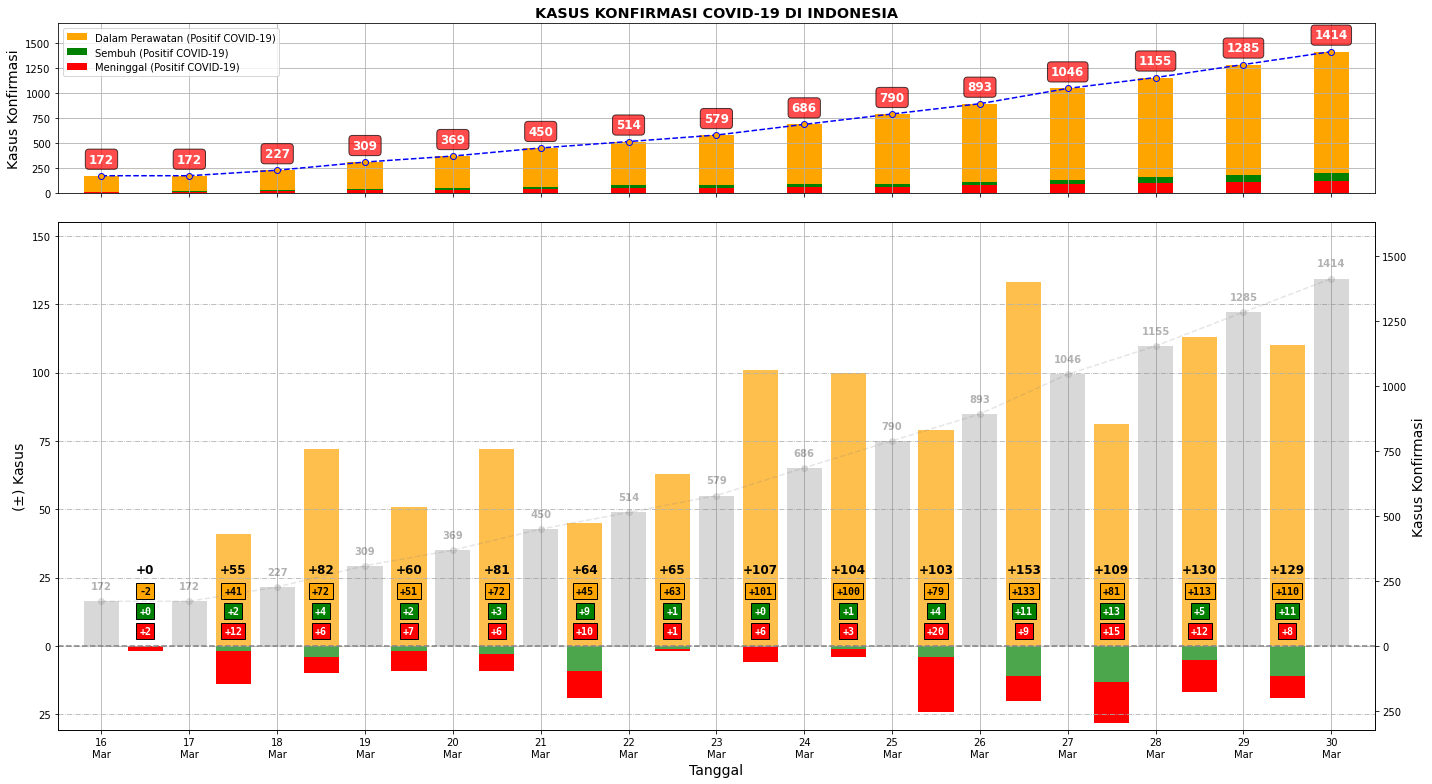

In [27]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

_MASK = None
_DATASET = raw_dataset[-15:]
_DAYS = 1

inkovis.plot_confirmed_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_confirmed_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/KONFIRMASI_PERKEMBANGAN_15AKHIR_HARIAN.png', dpi=150)

## JUMLAH SPESIMEN DAN PERKEMBANGAN

### Seluruh Data (Per 2 Hari)

/home/runner/work/inkovis/inkovis/notebook/inkovis.py:838: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


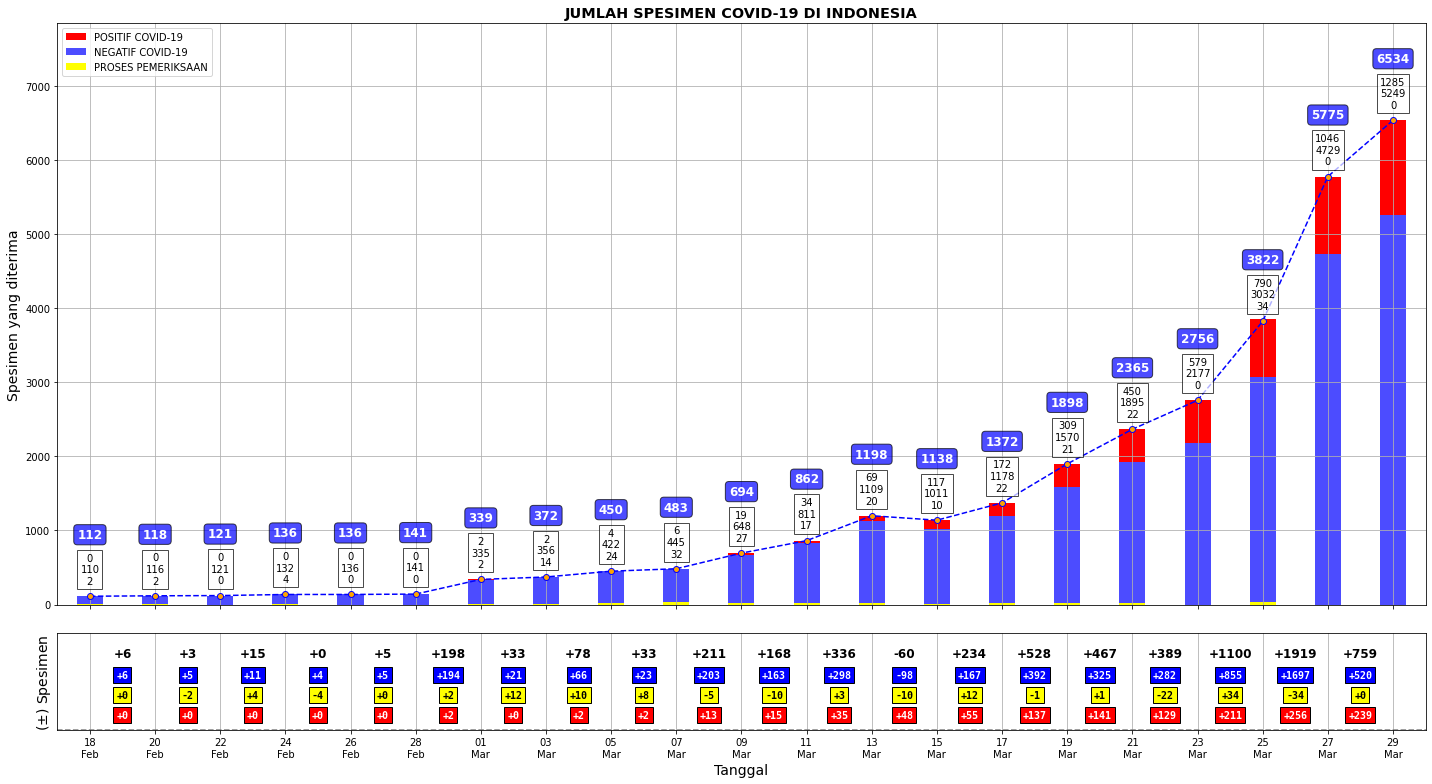

In [28]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[6, 1]})

_MASK = None
_DATASET = raw_dataset
_DAYS = 2

inkovis.plot_testing_case(
    _DATASET, ax[0], days=_DAYS, 
    show_diff_bar=False, show_info=False
)

inkovis.plot_testing_growth(
    _DATASET, ax[1], days=_DAYS, 
    show_bar=False, show_confirmed=False, 
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/SPESIMEN_PERKEMBANGAN_S_2HARI.png', dpi=150)

### Sejak Bulan Maret (Harian)

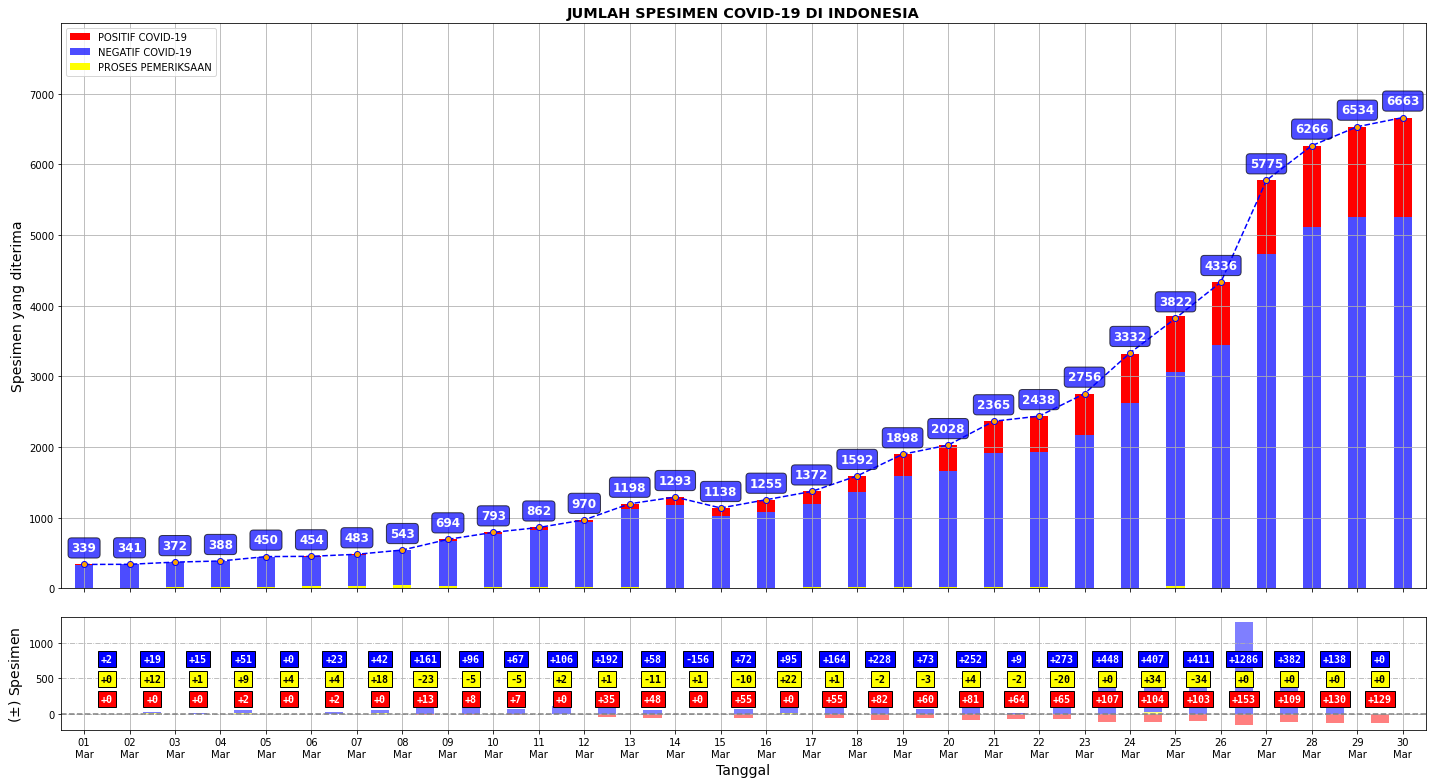

In [29]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[5, 1]})

_MASK = ('2020-03', None)
_DATASET = raw_dataset
_DAYS = 1

inkovis.plot_testing_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_testing_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=False, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/SPESIMEN_PERKEMBANGAN_SMARET_HARIAN.png', dpi=150)

### Sejak Bulan Maret (Per 2 Hari)

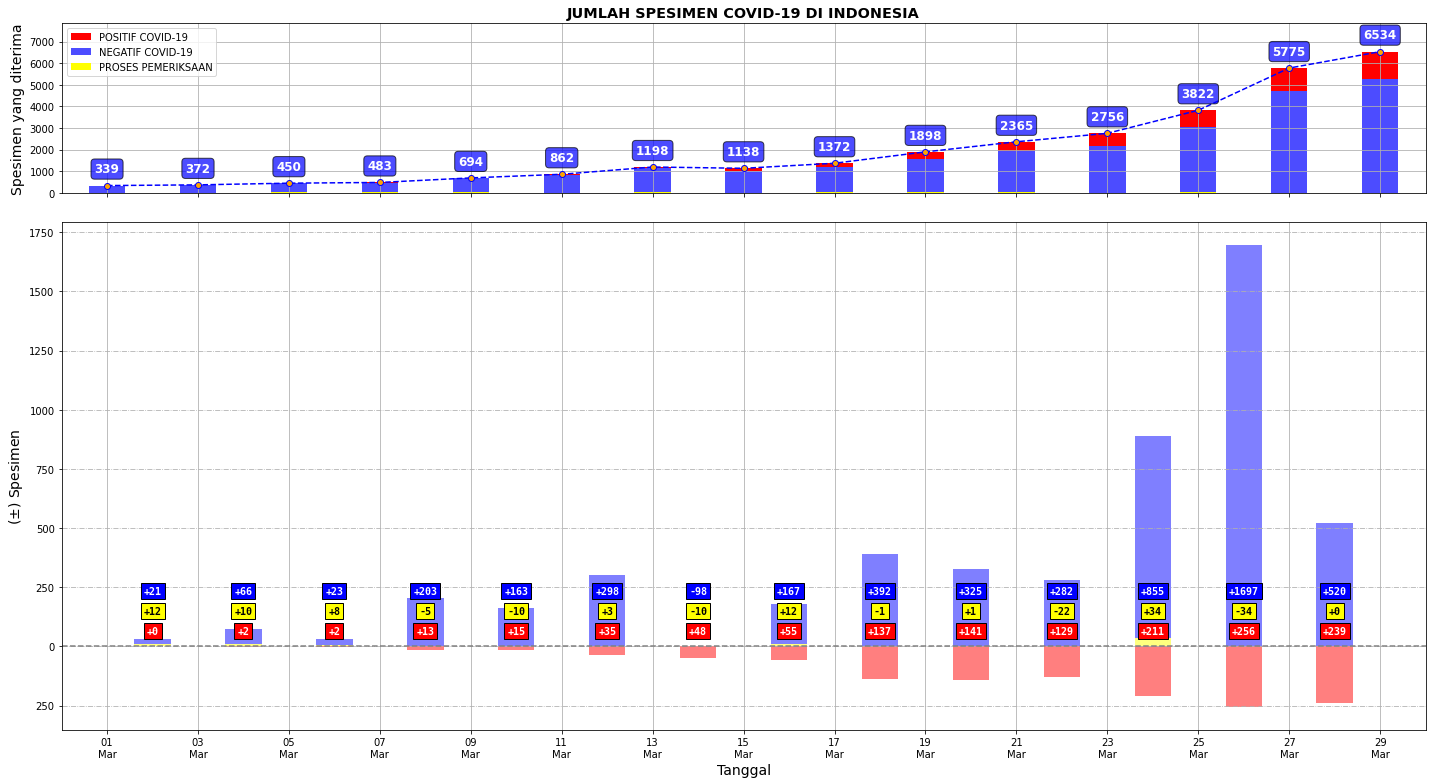

In [30]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

_MASK = ('2020-03', None)
_DATASET = raw_dataset
_DAYS = 2

inkovis.plot_testing_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_testing_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=False, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/SPESIMEN_PERKEMBANGAN_SMARET_2HARI.png', dpi=150)

### 15 Hari Terakhir (Harian)

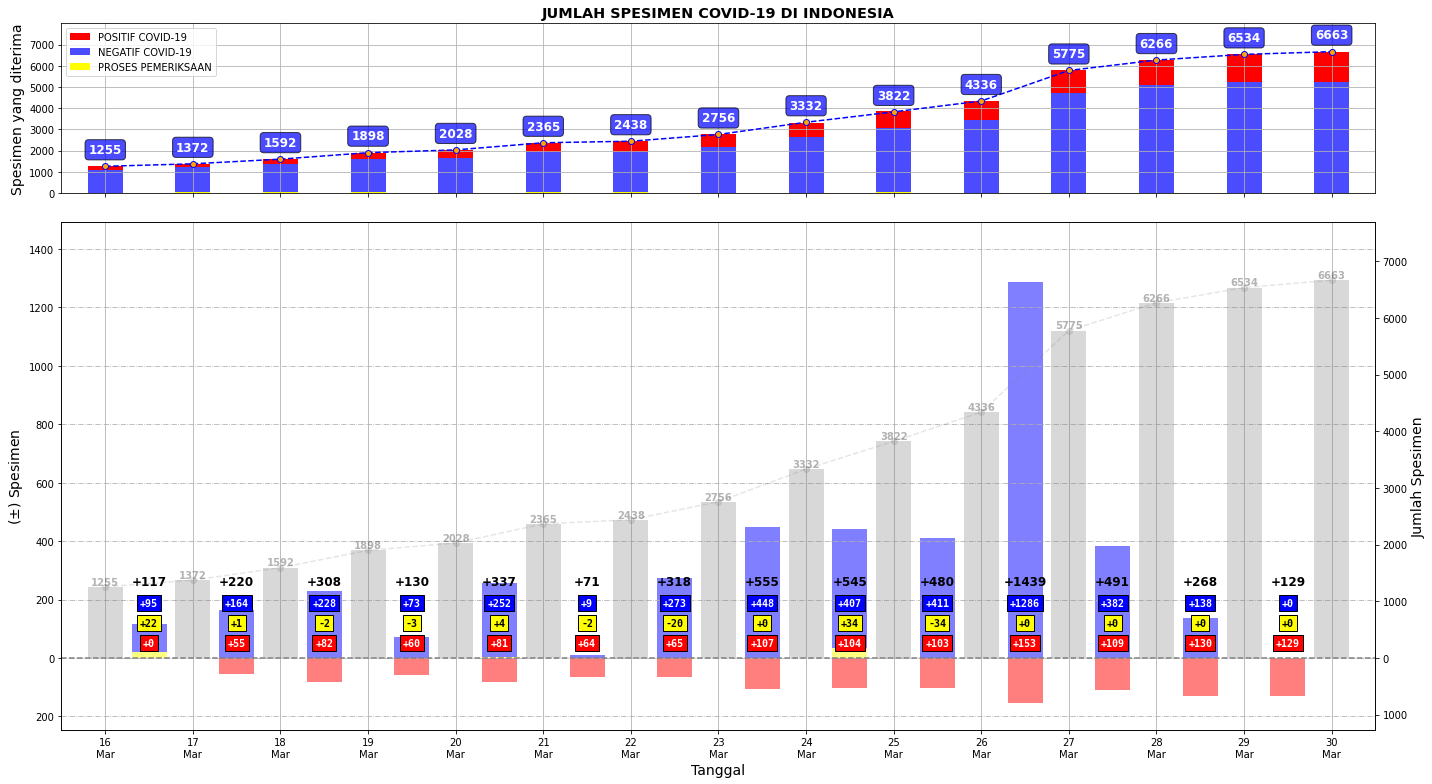

In [31]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(20, 11), sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

_MASK = None
_DATASET = raw_dataset[-15:]
_DAYS = 1

inkovis.plot_testing_case(
    _DATASET, ax[0], days=_DAYS, mask=_MASK,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_testing_growth(
    _DATASET, ax[1], days=_DAYS, mask=_MASK,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('')
# ax[0].xaxis.set_tick_params(labelbottom=True)
plt.savefig('IMG/SPESIMEN_PERKEMBANGAN_15AKHIR_HARIAN.png', dpi=150)